## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col="Timestamp",
    parse_dates=True,
    infer_datetime_format=True)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame.
# In this case, NaN values are filled with the mean of the dataset.
bitstamp = bitstamp.dropna()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", " ", regex=False)

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float 
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype("float")
bitstamp.loc[:, 'Close'].astype("float")

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: float64

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values.
bitstamp.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [10]:
# Drop duplicate values
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [11]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Replace all the NaNs with the mean value.
coinbase = coinbase.dropna()

In [12]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace('$', " ", regex=False)

In [13]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.loc[:, 'Close'].astype("float")

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
                         ...   
2018-03-31 23:55:00     6930.00
2018-03-31 23:56:00     6930.01
2018-03-31 23:57:00     6933.91
2018-03-31 23:58:00     6937.31
2018-03-31 23:59:00     6934.00
Name: Close, Length: 129322, dtype: float64

In [14]:
# Check to see if there are any duplicate values and drop if necessary.
coinbase.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


In [15]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [16]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [18]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [19]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

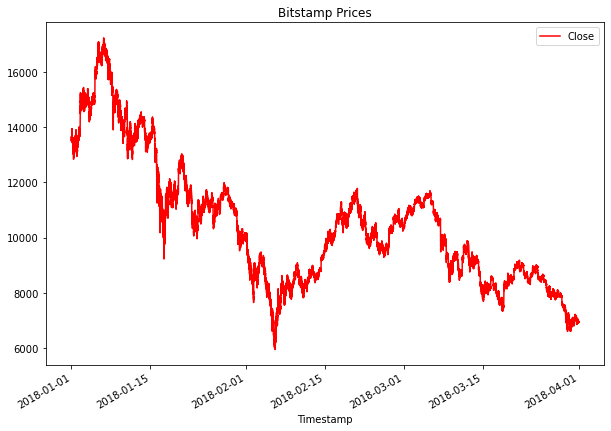

In [20]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(kind='line', figsize=(10,7), title="Bitstamp Prices", color='red')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

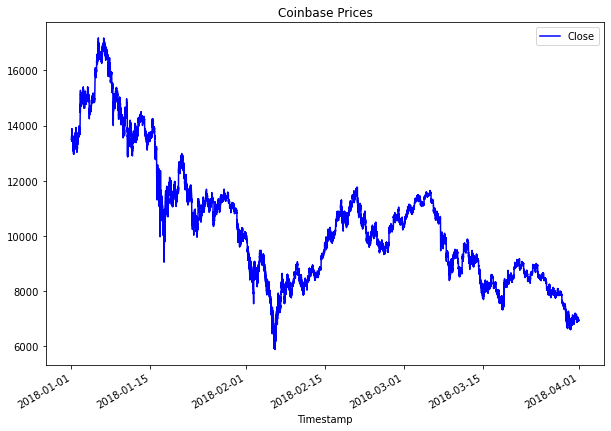

In [21]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(kind='line', figsize=(10,7), title="Coinbase Prices", color="blue")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase January through March 2018'}, xlabel='Timestamp'>

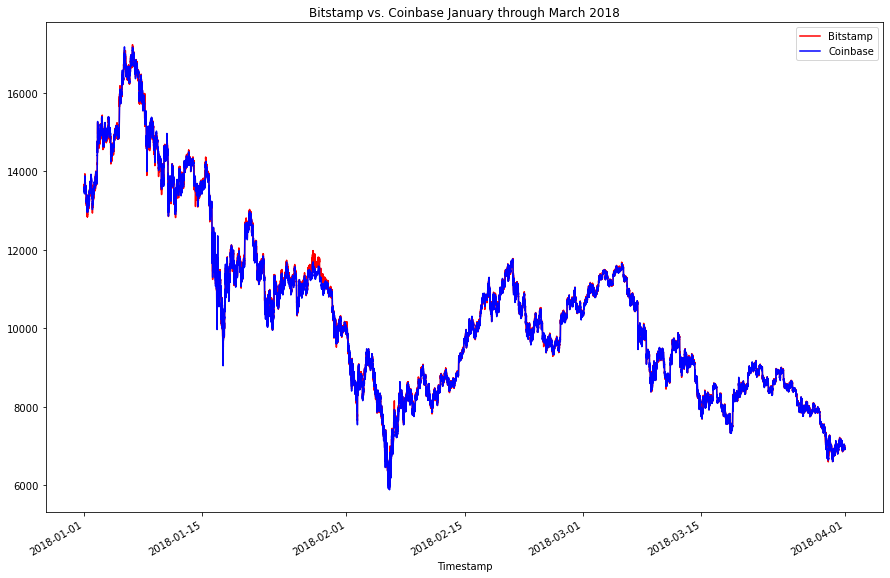

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase January through March 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase January 2018'}, xlabel='Timestamp'>

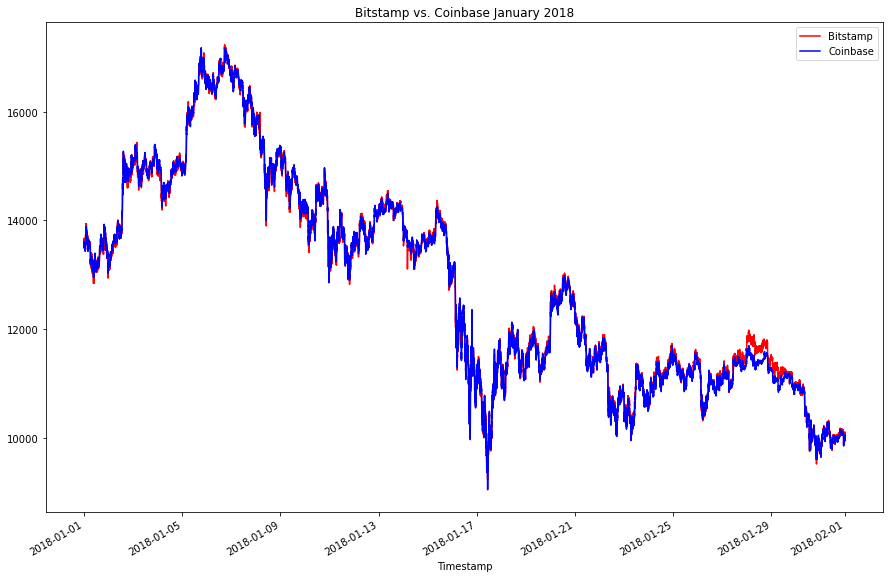

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase January 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase January 2018'}, xlabel='Timestamp'>

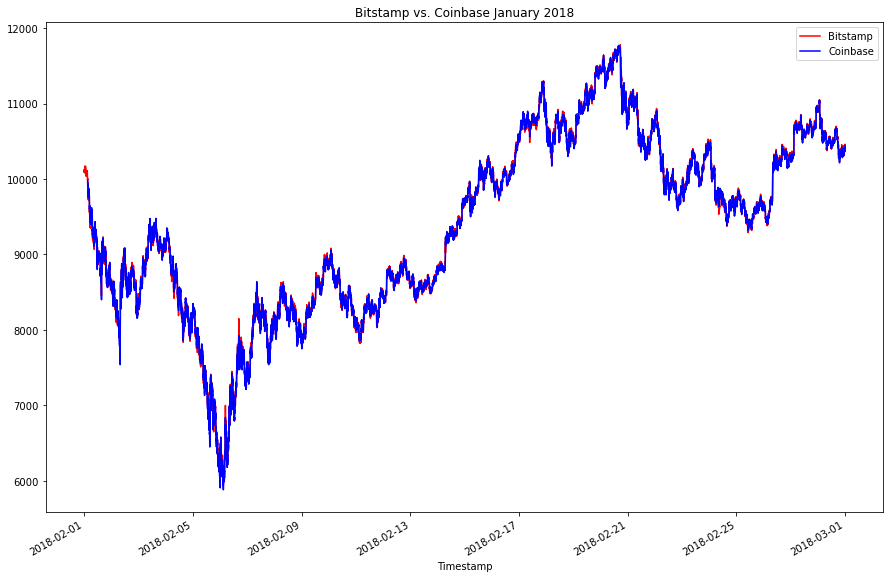

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period in the middle of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase January 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-01' : '2018-02-28'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase March 2018'}, xlabel='Timestamp'>

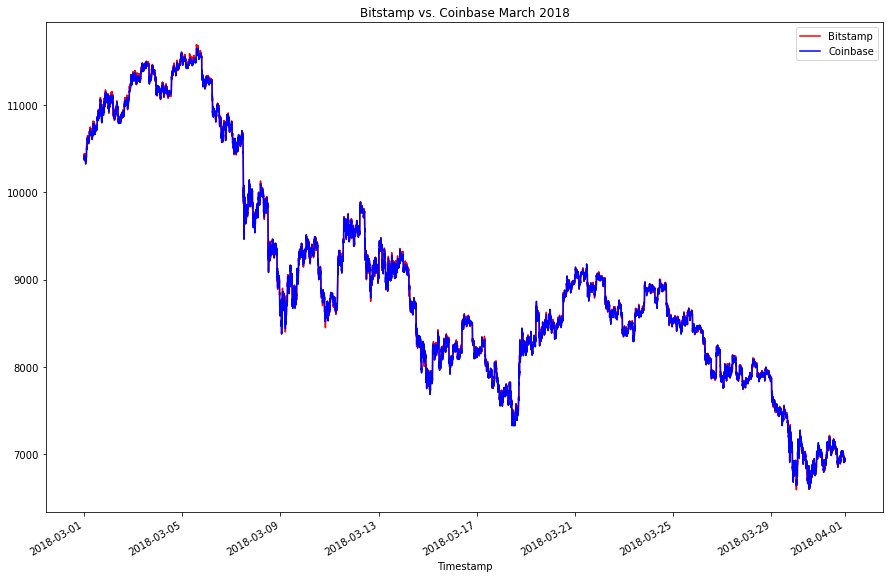

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase March 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Looking at the visualizations for varying time periods from January 1st, 2018 to April 1st, 2018 it seems that the degree of spread narrowed as time progressed. It looks like the greatest degree of spread was at the beginning, in January. Arouund halfway through February, the prices were nearly identical between Bitstamp and Coinbase. It can be assumed that the market returned to efficiency somewhere around mid- to late-February.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase January 4th, 2018'}, xlabel='Timestamp'>

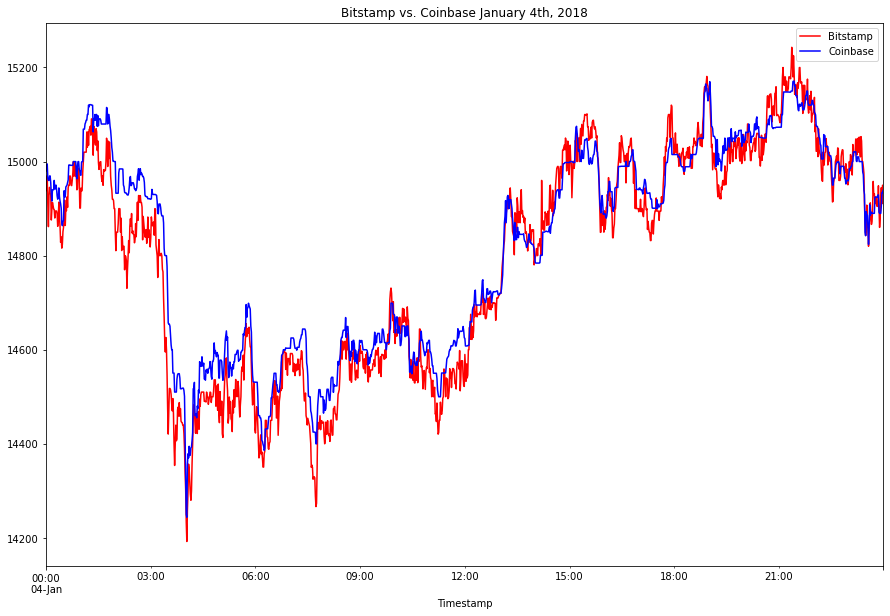

In [65]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-01-04'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase January 4th, 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-04'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [66]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced.loc['2018-01-04'] - bitstamp_sliced.loc['2018-01-04']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

,Close
count,1440.00000
mean,28.73225
std,50.00892
min,-159.12000
25%,-6.50500
50%,29.64500
75%,59.96750
max,240.00000


<AxesSubplot:title={'center':'Arbitrage Spread - January 4th, 2018'}>

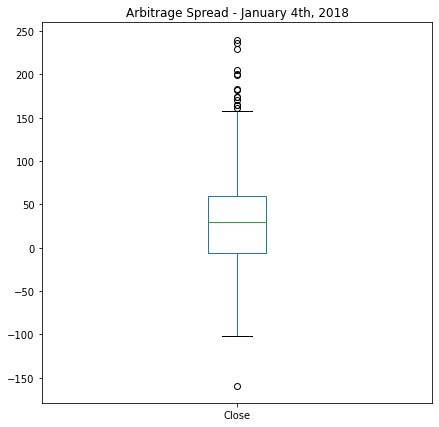

In [67]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', figsize=(7, 7), title="Arbitrage Spread - January 4th, 2018")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase February 24th, 2018'}, xlabel='Timestamp'>

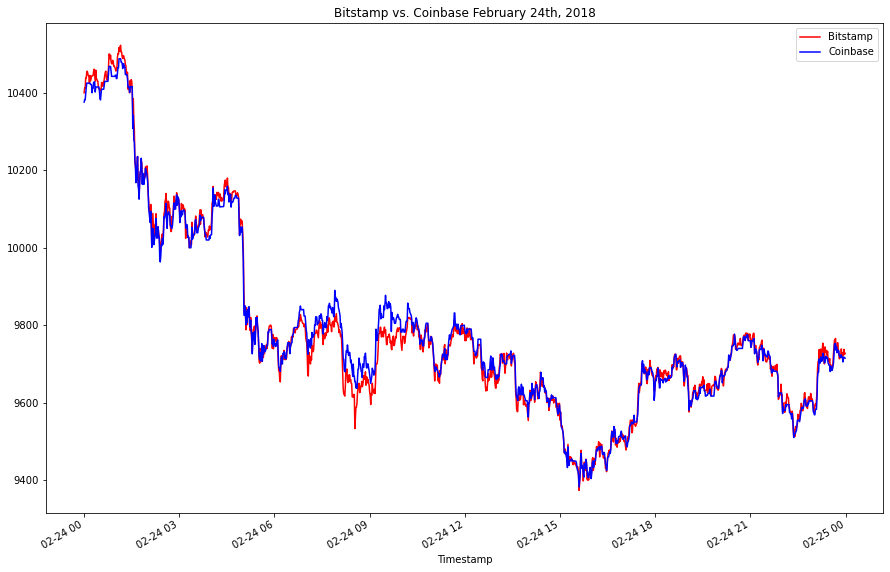

In [68]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-02-24'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase February 24th, 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-24'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [69]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-24'] - bitstamp_sliced.loc['2018-02-24']

# Generate summary statistics 
arbitrage_spread_middle.describe()

,Close
count,1437.000000
mean,3.396131
std,22.969472
min,-50.180000
25%,-10.590000
50%,-0.010000
75%,12.120000
max,121.320000


<AxesSubplot:title={'center':'Arbitrage Spread - February 24th, 2018'}>

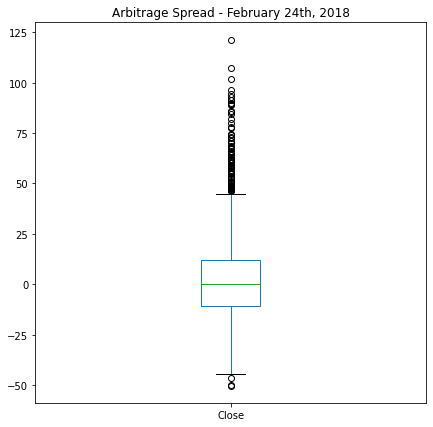

In [70]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', figsize=(7, 7), title="Arbitrage Spread - February 24th, 2018")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase March 10th, 2018'}, xlabel='Timestamp'>

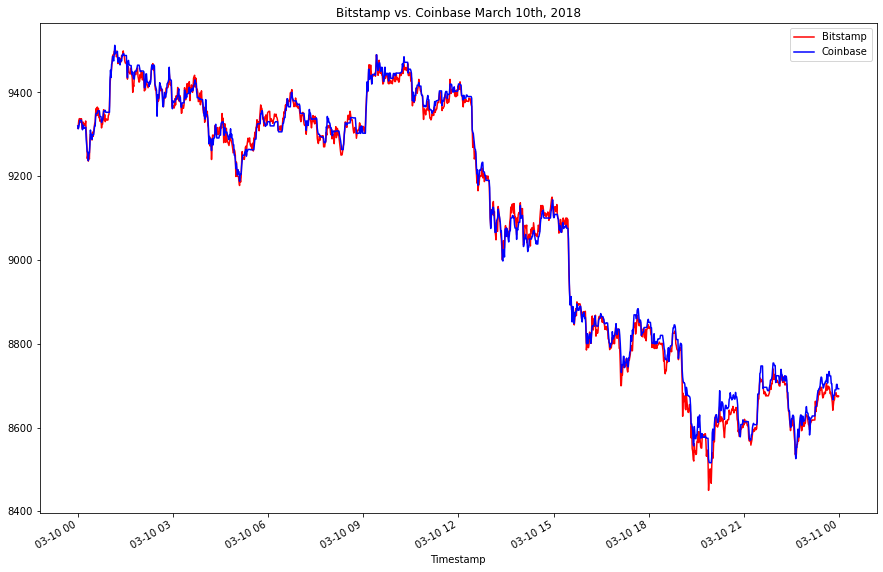

In [71]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-03-10'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase March 10th, 2018", color="red", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-10'].plot(legend=True, figsize=(15, 10), color="blue", label="Coinbase")

In [73]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced.loc['2018-03-10'] - bitstamp_sliced.loc['2018-03-10']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

,Close
count,1433.000000
mean,6.541417
std,15.953638
min,-36.860000
25%,-4.240000
50%,7.170000
75%,16.040000
max,93.180000


<AxesSubplot:title={'center':'Arbitrage Spread - March 10th, 2018'}>

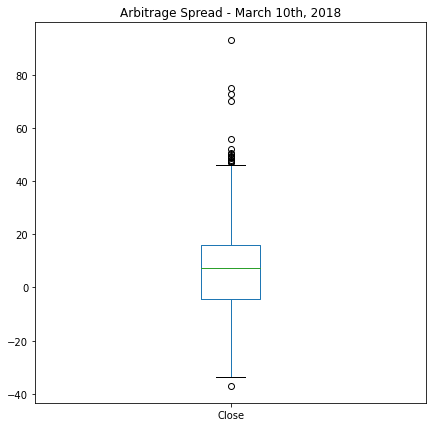

In [74]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', figsize=(7, 7), title="Arbitrage Spread - March 10th, 2018")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [75]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-04'] - bitstamp_sliced['Close'].loc['2018-01-04']

# Printing any arbitrage opportunities that are greater than 0 in a list.
print(arbitrage_spread_early.loc[arbitrage_spread_early>0].describe())

count    1024.000000
mean       52.519609
std        36.932341
min         0.010000
25%        24.825000
50%        46.505000
75%        71.810000
max       240.000000
Name: Close, dtype: float64


In [76]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-24'] - bitstamp_sliced['Close'].loc['2018-02-24']

# Printing any arbitrage opportunities that are greater than 0 in a list.
print(arbitrage_spread_middle.loc[arbitrage_spread_middle>0].describe())

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64


In [77]:
# For the date in the end of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-10'] - bitstamp_sliced['Close'].loc['2018-03-10']

# Printing any arbitrage opportunities that are greater than 0 in a list.
print(arbitrage_spread_late.loc[arbitrage_spread_late>0].describe())

count    963.000000
mean      15.001890
std       11.349685
min        0.010000
25%        7.025000
50%       12.660000
75%       19.985000
max       93.180000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [79]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-04']

# Review the spread return DataFrame
spread_return_early.dropna().head()

Timestamp
2018-01-04 00:00:00    0.002634
2018-01-04 00:01:00    0.002816
2018-01-04 00:02:00    0.001670
2018-01-04 00:03:00    0.003870
2018-01-04 00:04:00    0.006616
Name: Close, dtype: float64

In [80]:
# For the middle date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2018-02-24']

# Review the spread return DataFrame
spread_return_middle.dropna().head()

Timestamp
2018-02-24 00:10:00    0.000123
2018-02-24 00:27:00    0.000189
2018-02-24 00:28:00    0.000487
2018-02-24 01:23:00    0.000574
2018-02-24 01:24:00    0.000163
Name: Close, dtype: float64

In [81]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-03-10']

# Review the spread return DataFrame
spread_return_late.dropna().head()

Timestamp
2018-03-10 00:00:00    0.000631
2018-03-10 00:06:00    0.000502
2018-03-10 00:08:00    0.000793
2018-03-10 00:18:00    0.001732
2018-03-10 00:19:00    0.000813
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [82]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-04 01:59:00    0.010101
2018-01-04 02:10:00    0.011711
2018-01-04 02:12:00    0.011509
2018-01-04 02:15:00    0.011171
2018-01-04 02:19:00    0.013534
Name: Close, dtype: float64

In [83]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

In [84]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late>.01]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-10 19:04:00    0.010801
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [85]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    21.000000
mean      0.012226
std       0.002038
min       0.010004
25%       0.010639
50%       0.011509
75%       0.013534
max       0.016580
Name: Close, dtype: float64

In [86]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    3.000000
mean     0.011377
std      0.001199
min      0.010431
25%      0.010703
50%      0.010974
75%      0.011850
max      0.012726
Name: Close, dtype: float64

In [87]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    1.000000
mean     0.010801
std           NaN
min      0.010801
25%      0.010801
50%      0.010801
75%      0.010801
max      0.010801
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [93]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = spread_return_early * bitstamp_sliced['Close'].loc['2018-01-04']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-04 00:00:00    39.37
2018-01-04 00:01:00    42.07
2018-01-04 00:02:00    25.00
2018-01-04 00:03:00    57.68
2018-01-04 00:04:00    98.32
Name: Close, dtype: float64

In [94]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = spread_return_middle * bitstamp_sliced['Close'].loc['2018-02-24']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-24 00:10:00    1.28
2018-02-24 00:27:00    1.97
2018-02-24 00:28:00    5.07
2018-02-24 01:23:00    5.97
2018-02-24 01:24:00    1.70
Name: Close, dtype: float64

In [95]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = spread_return_late * bitstamp_sliced['Close'].loc['2018-03-10']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-03-10 00:00:00     5.88
2018-03-10 00:06:00     4.68
2018-03-10 00:08:00     7.39
2018-03-10 00:18:00    16.01
2018-03-10 00:19:00     7.52
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [96]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1024.000000
mean       52.519609
std        36.932341
min         0.010000
25%        24.825000
50%        46.505000
75%        71.810000
max       240.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Profit Plot'}, xlabel='Timestamp'>

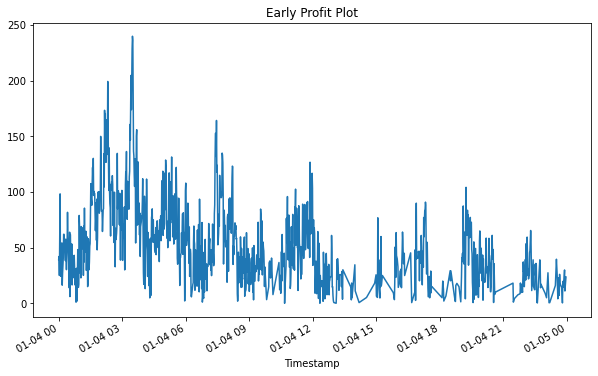

In [97]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 6), title='Early Profit Plot')

In [98]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Profit Plot'}, xlabel='Timestamp'>

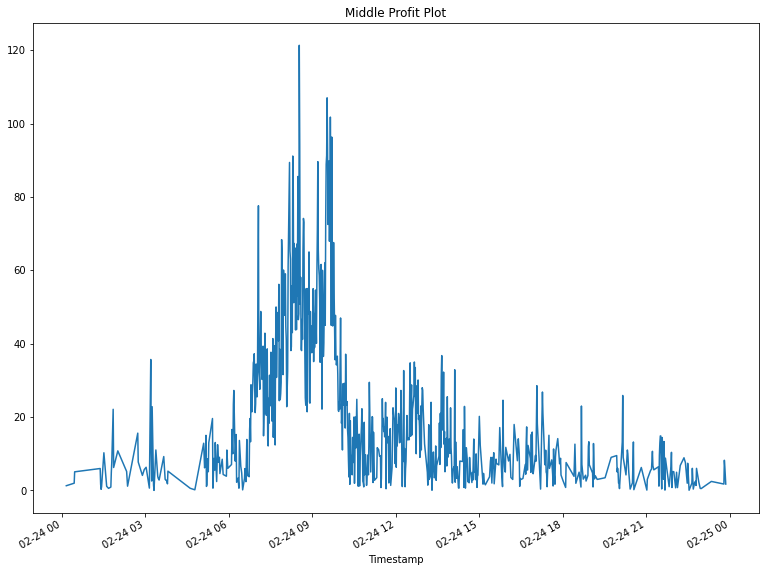

In [99]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(13, 10), title='Middle Profit Plot')

In [100]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    963.000000
mean      15.001890
std       11.349685
min        0.010000
25%        7.025000
50%       12.660000
75%       19.985000
max       93.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Profit Plot'}, xlabel='Timestamp'>

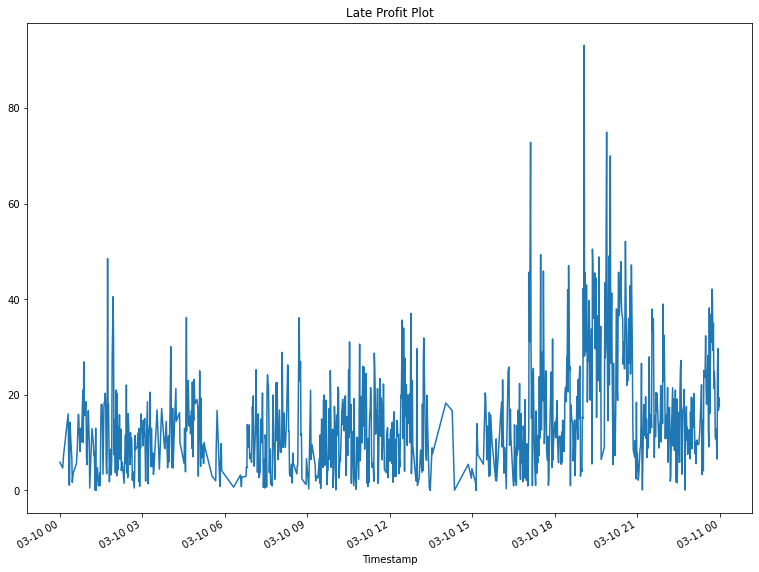

In [101]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(13, 10), title='Late Profit Plot')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [102]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
early_profit_sum = profit_per_trade_early.sum()
early_profit_sum

53780.08000000005

In [103]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
middle_profit_sum = profit_per_trade_middle.sum()
middle_profit_sum

14174.690000000028

In [104]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
late_profit_sum = profit_per_trade_late.sum()
late_profit_sum

14446.820000000005

In [106]:
total_profit_sum = early_profit_sum + middle_profit_sum + late_profit_sum
total_profit_sum

82401.59000000008

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [107]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-04 00:00:00       39.37
2018-01-04 00:01:00       81.44
2018-01-04 00:02:00      106.44
2018-01-04 00:03:00      164.12
2018-01-04 00:04:00      262.44
                         ...   
2018-01-04 23:49:00    53700.75
2018-01-04 23:50:00    53715.48
2018-01-04 23:53:00    53745.43
2018-01-04 23:54:00    53756.47
2018-01-04 23:57:00    53780.08
Name: Close, Length: 1024, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profit - Early'}, xlabel='Timestamp'>

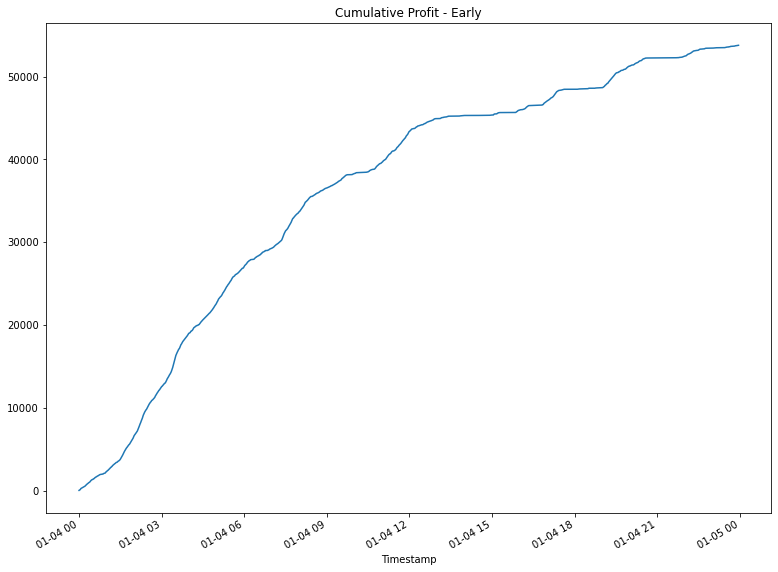

In [108]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(13, 10), title='Cumulative Profit - Early')

In [109]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Timestamp
2018-02-24 00:10:00        1.28
2018-02-24 00:27:00        3.25
2018-02-24 00:28:00        8.32
2018-02-24 01:23:00       14.29
2018-02-24 01:24:00       15.99
                         ...   
2018-02-24 23:20:00    14156.56
2018-02-24 23:47:00    14158.30
2018-02-24 23:48:00    14166.52
2018-02-24 23:49:00    14172.96
2018-02-24 23:51:00    14174.69
Name: Close, Length: 713, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profit - Middle'}, xlabel='Timestamp'>

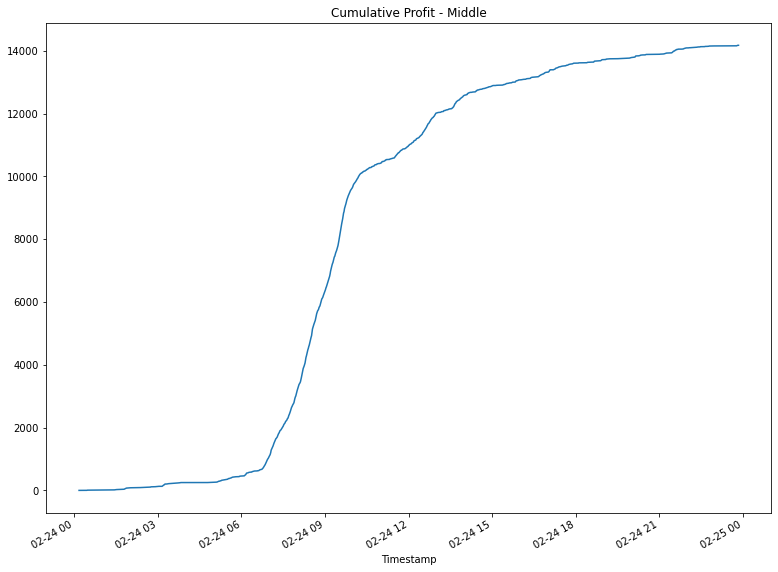

In [110]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(13, 10), title='Cumulative Profit - Middle')

In [111]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-10 00:00:00        5.88
2018-03-10 00:06:00       10.56
2018-03-10 00:08:00       17.95
2018-03-10 00:18:00       33.96
2018-03-10 00:19:00       41.48
                         ...   
2018-03-10 23:55:00    14363.34
2018-03-10 23:56:00    14393.02
2018-03-10 23:57:00    14409.81
2018-03-10 23:58:00    14429.20
2018-03-10 23:59:00    14446.82
Name: Close, Length: 963, dtype: float64

<AxesSubplot:title={'center':'Cumulative Profit - Late'}, xlabel='Timestamp'>

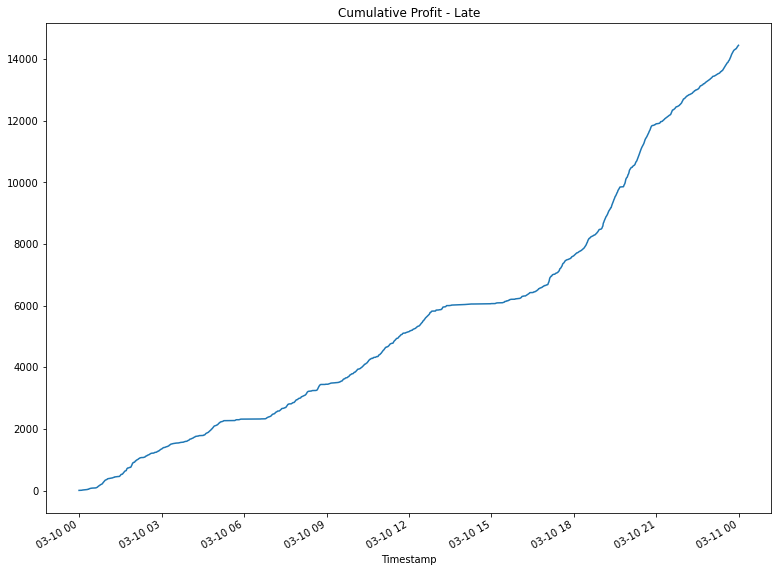

In [112]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(13, 10), title='Cumulative Profit - Late')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** As is expected with arbitrage opportunities, as they are exploited the profitability and margins to be made gradually disappear as the market efficiency improves. In January the profits were the greatest and by March they had nearly dried up, with no trades appearing to be greater than 1% profit to cover the trading costs throughout a majority of February and March. The market returning to efficieny for the most part around mid-February which explains why the later date selected in February returned no profitable trades.